In [2]:
import pandas as pd
import numpy as np

Importing the data set

In [3]:
df_energy_consumption = pd.read_csv(r".\Data\per-capita-energy-use.csv")

In [4]:
df_energy_consumption.head()

,Entity,Code,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290


Renaming a column for readibility.

In [5]:
df_energy_consumption.rename(columns={'Primary energy consumption per capita (kWh/person)':'Energy Consumption'},inplace=True)

In [6]:
df_energy_consumption

,Entity,Code,Year,Energy Consumption
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290
...,...,...,...,...
10689,Zimbabwe,ZWE,2017,3068.01150
10690,Zimbabwe,ZWE,2018,3441.98580
10691,Zimbabwe,ZWE,2019,3003.65530
10692,Zimbabwe,ZWE,2020,2680.13180


In [7]:
celdas = df_energy_consumption.isnull()

# Getting Null Rows

In [8]:
df_energy_consumption[df_energy_consumption['Code'].isnull()]

,Entity,Code,Year,Energy Consumption
42,Africa,NaN,1965,2228.4226
43,Africa,NaN,1966,2275.4866
44,Africa,NaN,1967,2241.3489
45,Africa,NaN,1968,2307.3240
46,Africa,NaN,1969,2310.4080
...,...,...,...,...
10208,Upper-middle-income countries,NaN,2019,26831.7560
10209,Upper-middle-income countries,NaN,2020,26670.7440
10210,Upper-middle-income countries,NaN,2021,28023.3050
10211,Upper-middle-income countries,NaN,2022,28782.3960


# Getting the top countries based on energy consumption from 2023

In [9]:
df_energy_consumption.groupby(by=df_energy_consumption['Entity'])

Filtering by year

In [10]:
df_energy_consumption_2023=df_energy_consumption[df_energy_consumption['Year']==2023]
df_energy_consumption_2023

,Entity,Code,Year,Energy Consumption
100,Africa,NaN,2023,3969.2842
201,Algeria,DZA,2023,15458.3900
386,Argentina,ARG,2023,22277.7930
511,Asia,NaN,2023,19917.4220
570,Australia,AUS,2023,63256.8800
...,...,...,...,...
10212,Upper-middle-income countries,NaN,2023,29986.7950
10293,Uzbekistan,UZB,2023,16622.7360
10394,Venezuela,VEN,2023,24383.1170
10453,Vietnam,VNM,2023,13744.1490


# Grouping by Entity and summing up the consumption from 2023

In [11]:
df_energy_consumption_2023.groupby('Entity').sum('Energy_Consumption')

,Year,Energy Consumption
Entity,,
Africa,2023,3969.2842
Algeria,2023,15458.3900
Argentina,2023,22277.7930
Asia,2023,19917.4220
Australia,2023,63256.8800
...,...,...
Upper-middle-income countries,2023,29986.7950
Uzbekistan,2023,16622.7360
Venezuela,2023,24383.1170


# Sorting the filtered dataframe to show top 10 and dropping the Null values because they not represent countries but continents

In [12]:
df_top_country_consumption=df_energy_consumption_2023.sort_values('Energy Consumption',ascending=False).head(10)
df_top_country_consumption = df_top_country_consumption.dropna()

# Top countries

In [13]:
df_top_country_consumption

,Entity,Code,Year,Energy Consumption
7793,Qatar,QAT,2023,226847.66
4394,Iceland,ISL,2023,167421.55
8543,Singapore,SGP,2023,160276.98
9993,United Arab Emirates,ARE,2023,149830.33
9602,Trinidad and Tobago,TTO,2023,106746.78
5146,Kuwait,KWT,2023,101647.75
7128,Norway,NOR,2023,101031.67
1656,Canada,CAN,2023,99916.40
7246,Oman,OMN,2023,92605.32
8328,Saudi Arabia,SAU,2023,87198.66


# Identifying the zero values for energy consumption to interpolate their values

In [14]:
df_energy_consumption[df_energy_consumption['Energy Consumption']==0].count()

Entity                157
Code                  157
Year                  157
Energy Consumption    157
dtype: int64

All zero values in the dataframe are being replaced with NaN (Not a Number) using the replace() method.
This is done so that missing or invalid energy consumption values (originally marked as 0) can be handled properly,
In this case, by interpolation in later steps. After replacement, the updated dataframe is displayed.

In [15]:
# Replacing zero values with NaN for interpolation
df_energy_consumption.replace(0,np.nan,inplace=True)
df_energy_consumption

,Entity,Code,Year,Energy Consumption
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290
...,...,...,...,...
10689,Zimbabwe,ZWE,2017,3068.01150
10690,Zimbabwe,ZWE,2018,3441.98580
10691,Zimbabwe,ZWE,2019,3003.65530
10692,Zimbabwe,ZWE,2020,2680.13180


This line performs interpolation on the 'Energy Consumption' column of the df_energy_consumption DataFrame. It fills missing (NaN) values using a polynomial interpolation of order 2 (quadratic), estimating the missing values based on the trend of the existing data. The result is a Series with interpolated values, but it does not modify the original DataFrame unless you assign it back.

In [16]:

df_energy_consumption['Energy Consumption'].interpolate(method='polynomial', order=2)

0         623.92865
1         786.83690
2         926.65125
3        1149.19590
4        1121.57290
            ...    
10689    3068.01150
10690    3441.98580
10691    3003.65530
10692    2680.13180
10693    2635.15360
Name: Energy Consumption, Length: 10694, dtype: float64

In [17]:
df_energy_consumption

,Entity,Code,Year,Energy Consumption
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290
...,...,...,...,...
10689,Zimbabwe,ZWE,2017,3068.01150
10690,Zimbabwe,ZWE,2018,3441.98580
10691,Zimbabwe,ZWE,2019,3003.65530
10692,Zimbabwe,ZWE,2020,2680.13180


# Exploring the data

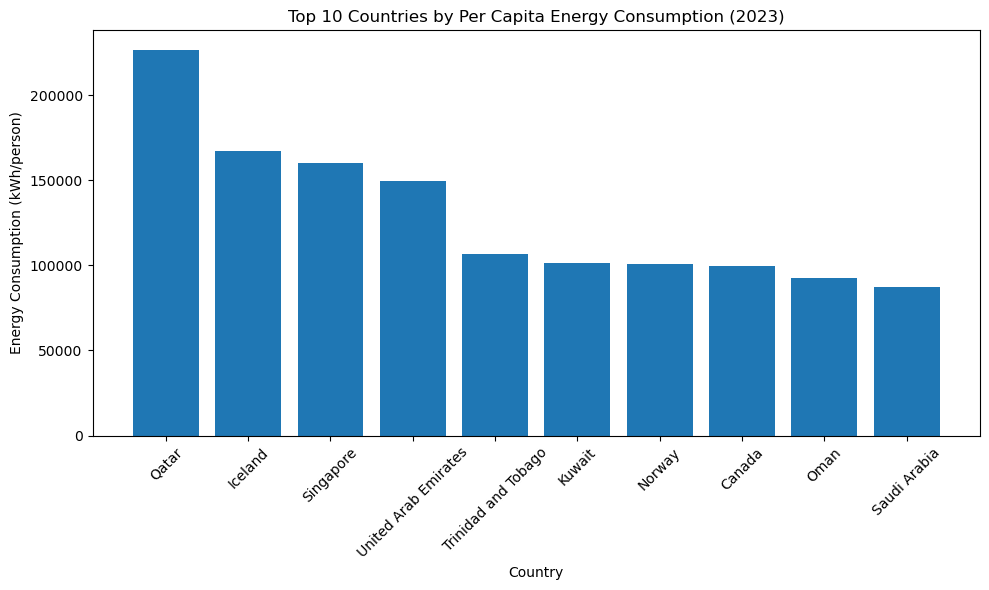

In [18]:
import matplotlib.pyplot as plt

# Plotting the top 10 countries by energy consumption in 2023
plt.figure(figsize=(10,6))
plt.bar(df_top_country_consumption['Entity'], df_top_country_consumption['Energy Consumption'])
plt.xlabel('Country')
plt.ylabel('Energy Consumption (kWh/person)')
plt.title('Top 10 Countries by Per Capita Energy Consumption (2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Using linear regression for 5 years projection of consumption.

Projection plays a crucial role in this project as it enables us to estimate future energy consumption trends for different countries based on historical data. By forecasting energy needs for the coming years, we can provide valuable insights for policymakers, industry stakeholders, and researchers. These projections support informed decision-making regarding infrastructure investments, resource management, and the development of sustainable energy policies. Ultimately, accurate projections help anticipate challenges, identify opportunities, and ensure that future energy demands can be met efficiently and responsibly.

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Projection year
year_proj = 2028

# Copy of the base DataFrame
df_projection = df_top_country_consumption.copy()
projections = []

# Loop through each country in the top consumption list
for idx, row in df_top_country_consumption.iterrows():
    country = row['Entity']
    # Get historical data for this country
    country_data = df_energy_consumption[df_energy_consumption['Entity'] == country].dropna(subset=['Energy Consumption'])
    X = country_data[['Year']]
    y = country_data['Energy Consumption']

    # Fit the model if there's enough data
    if len(X) >= 2:
        model = LinearRegression()
        model.fit(X, y)
        # Predict energy consumption for 2028
        consumption_proj = model.predict(pd.DataFrame({'Year': [year_proj]}))[0]
    else:
        consumption_proj = np.nan  # Not enough data

    projections.append(consumption_proj)

# Add the projections to the DataFrame
df_projection['Projected Consumption 2028'] = projections

# (Optional) Add actual 2023 consumption if available
df_2023 = df_energy_consumption[df_energy_consumption['Year'] == 2023][['Entity', 'Energy Consumption']]
df_2023.rename(columns={'Energy Consumption': 'Consumption 2023'}, inplace=True)
df_projection = df_projection.merge(df_2023, on='Entity', how='left')

# Display the results
df_projection[['Entity', 'Consumption 2023', 'Projected Consumption 2028']]

,Entity,Consumption 2023,Projected Consumption 2028
0,Qatar,226847.66,279812.481363
1,Iceland,167421.55,199008.330015
2,Singapore,160276.98,184553.369113
3,United Arab Emirates,149830.33,190345.346180
4,Trinidad and Tobago,106746.78,160327.863267
5,Kuwait,101647.75,111850.145692
6,Norway,101031.67,121776.228501
7,Canada,99916.40,120645.826576
8,Oman,92605.32,96210.884657
9,Saudi Arabia,87198.66,95324.167256


# Comparison between 2023 and 2028 consumption of the top 10 countries.

The plot in the next cell compares the actual per capita energy consumption in 2023 with the projected per capita energy consumption in 2028 for the top 10 countries. Each country is represented by two bars: one for the actual 2023 value and one for the projected 2028 value. This visualization helps to easily compare current and future energy consumption trends for these countries.


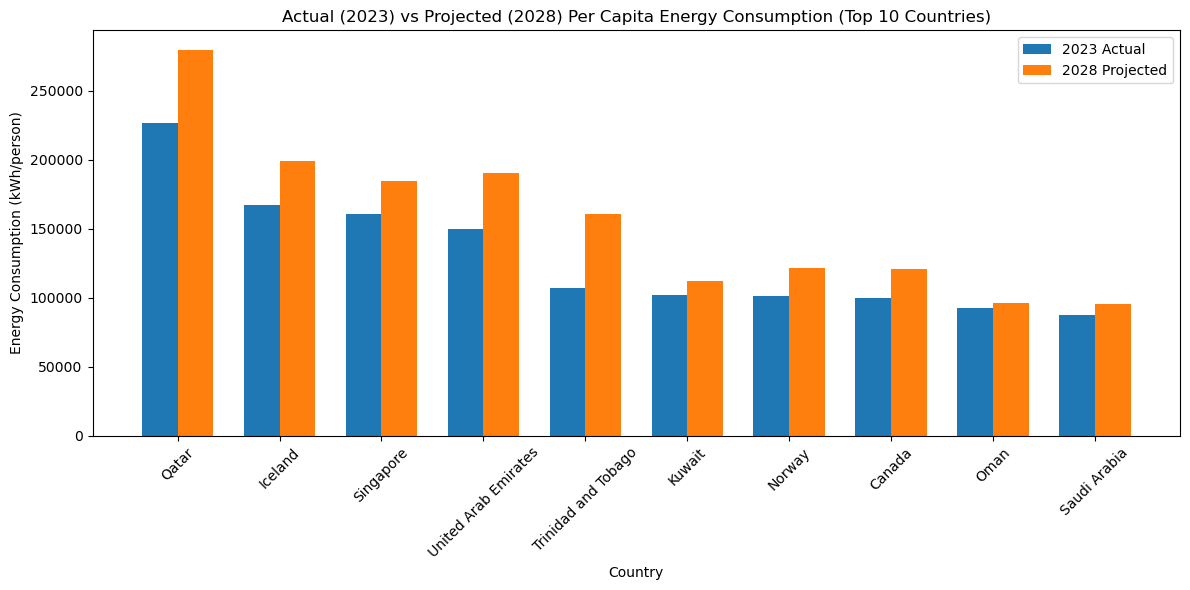

In [32]:
plt.figure(figsize=(12, 6))
x = np.arange(len(df_projection['Entity']))
width = 0.35

plt.bar(x - width/2, df_projection['Consumption 2023'], width, label='2023 Actual')
plt.bar(x + width/2, df_projection['Projected Consumption 2028'], width, label='2028 Projected')

plt.xlabel('Country')
plt.ylabel('Energy Consumption (kWh/person)')
plt.title('Actual (2023) vs Projected (2028) Per Capita Energy Consumption (Top 10 Countries)')
plt.xticks(x, df_projection['Entity'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion

In this project, we analyzed global per capita energy consumption data, focusing on identifying trends and projecting future consumption for the top 10 countries. The workflow included:

- Importing and cleaning the dataset, including handling missing and zero values through interpolation.
- Filtering the data to focus on the year 2023 and identifying the top 10 countries with the highest per capita energy consumption.
- Visualizing the energy consumption of these top countries for 2023.
- Applying linear regression to project the per capita energy consumption for these countries in 2028.
- Comparing actual 2023 values with the projected 2028 values using bar plots for clear visualization.

The analysis revealed significant disparities in energy consumption across countries, with nations like Qatar, Iceland, and Singapore leading in per capita usage. The projections suggest that these countries will continue to see high or increasing consumption trends by 2028. This information can be valuable for policymakers and researchers interested in energy planning and sustainability efforts.
